# Simple MNIST Handwritten Digit Recognition

by Luca Göttle 198319 

Used Resources:
- https://www.youtube.com/watch?v=wQ8BIBpya2k
- https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/
- https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

This notebook contains sample neural networks, that use the MNIST data set to recognize handwritten digits. 

## Imports

Tensorflow and Keras are used to create and train the model. matplotlib.pyplot is used to visualize the acuraccy of the models. 

In [1]:
import tensorflow as tf 
import keras as keras
import matplotlib.pyplot as plt
import time as time

mnist = tf.keras.datasets.mnist # import mnist dataset
(x_train, y_train), (x_test, y_test) = (mnist.load_data()) # and load dataset

## Normalize data

Later on, the performance of the same model on the original data and the normalized data is assessed. 

In [2]:
# normalize mnist dataset to improve performance
x_train_norm = tf.keras.utils.normalize(x_train, axis=1)
x_test_norm = tf.keras.utils.normalize(x_test, axis=1)

## Model builder

A function to create a NN model from a definition object.

In [3]:
def build_model(model_def):
    """
    Arguments:
    model_def: <class 'dict'> the model definition
        input_layer: <class tf.keras.layers> the input layer
        hidden_layers: <list <class tf.keras.layers>> hidden layers
        output_layer: <class tf.keras.layers> output layer
        optimizer: (string) the optimizer 
        loss_func: (string) name of the loss function
        metrics: (list <string>) metrics to track while training the model 
    
    Returns:
    model -- keras model
    """
    model = tf.keras.models.Sequential() # sequential model
    model.add(model_def["input_layer"]) # Flatten input layer
    for hidden_layer in model_def["hidden_layers"]:
        model.add(hidden_layer)
    model.add(model_def["output_layer"]) # output layer
    model.compile(
        optimizer= model_def["optimizer"],
        loss= model_def["loss_func"],
        metrics= model_def["metrics"]
    )

    return model
    

## Train and evaluate models

In [10]:
def run_model(model, train_x, train_y, test_x, test_y, epochs = 50, batch_size = 32, name = "Unnamed model"):
    """
    Arguments:
    model: <class tf.keras.Model> the model
    train_x: <list> training data
    train_y: <list> training data labels
    test_x:  <list> validation data
    test_y:  <list> validation data labels
    epochs: <number> how many epochs to train
    batch_size: <number> mini batch size
    name: <string> the name of the model
    
    Returns:
    None
    """
    # create callbacks
    callbacks = []
    # early stopping callback
    # will stop trainign when metric validation accuracy hasn't improved in five epochs
    # restores the best performing weights
    earlyStopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True)
    callbacks.append(earlyStopping_cb)
    
    # fit the model to the data
    time_start = time.process_time() # start timer
    history = model.fit(
        train_x,
        train_y,
        verbose=1,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        validation_data=(test_x, test_y))
    time_end = time.process_time() # end timer
    
    #training metrics
    train_metrics = model.evaluate(
        x=train_x,
        y=train_y,
        verbose=0,
        return_dict=True,
        use_multiprocessing=True)
    
    #test metrics
    test_metrics = model.evaluate(
        x=test_x,
        y=test_y,
        verbose=0,
        return_dict=True,
        use_multiprocessing=True)
    
    # display the data
    plt.title(name)
    keys = []
    
    # plot all tracked metrics
    for key in history.history.keys():
        plt.plot(history.history[key])
    
    plt.title(name)
    plt.ylim((0,1.1))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(history.history.keys(), loc='lower right')
    plt.show()
    
    #print training metadata
    print("trained in {} epochs".format(history.epoch[-1]+1))
    print("trained in {:.2f} seconds".format((time_end-time_start)))
    print("training accuracy is {:.4f}".format(train_metrics['accuracy']))
    print("test accuracy is {:.4f}".format(test_metrics['accuracy']))
    print('\n\n')

## Model definitions

### 3blue1brown model

This model has two layers with 16 units each. The activation function is ReLU. The optimizer is Stochastic Gradient Descent.

On my machine, the performance is ... abysmal, with around 11% accuracy. By only replacing SGD with Adam, the accuracy jumps to ~93% (with normalized data).  

Epoch 1/50
15000/15000 [==============================] - 20s 1ms/step - loss: 14.9487 - accuracy: 0.1107 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 2/50
15000/15000 [==============================] - 21s 1ms/step - loss: 2.3024 - accuracy: 0.1103 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/50
15000/15000 [==============================] - 20s 1ms/step - loss: 2.3024 - accuracy: 0.1094 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 4/50
15000/15000 [==============================] - 20s 1ms/step - loss: 2.3024 - accuracy: 0.1096 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 5/50
15000/15000 [==============================] - 20s 1ms/step - loss: 2.3024 - accuracy: 0.1099 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 6/50
15000/15000 [==============================] - 21s 1ms/step - loss: 2.3024 - accuracy: 0.1099 - val_loss: 2.3013 - val_accuracy: 0.1135


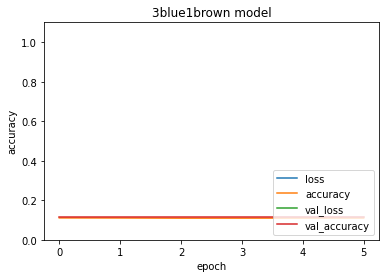

trained in 6 epochs
trained in 180.86 seconds
training accuracy is 0.1124
test accuracy is 0.1135



Epoch 1/50
15000/15000 [==============================] - 20s 1ms/step - loss: 2.3023 - accuracy: 0.1096 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/50
15000/15000 [==============================] - 20s 1ms/step - loss: 2.3022 - accuracy: 0.1113 - val_loss: 2.3025 - val_accuracy: 0.1028
Epoch 3/50
15000/15000 [==============================] - 19s 1ms/step - loss: 2.3024 - accuracy: 0.1093 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 4/50
15000/15000 [==============================] - 20s 1ms/step - loss: 2.3025 - accuracy: 0.1097 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 5/50
15000/15000 [==============================] - 21s 1ms/step - loss: 2.3022 - accuracy: 0.1105 - val_loss: 2.3031 - val_accuracy: 0.1135
Epoch 6/50
15000/15000 [==============================] - 19s 1ms/step - loss: 2.3023 - accuracy: 0.1123 - val_loss: 2.3036 - val_accuracy: 0.1028


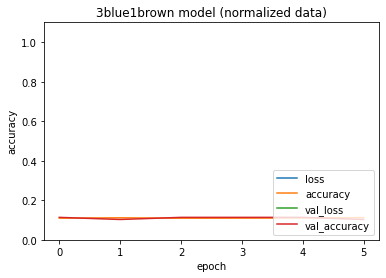

trained in 6 epochs
trained in 185.05 seconds
training accuracy is 0.1124
test accuracy is 0.1135





In [12]:
model_def = {
    "name": "3blue1brown model",
    "input_layer": tf.keras.layers.Flatten(),
    "hidden_layers": [
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(16, activation=tf.nn.relu)
    ],
    "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    "optimizer": tf.keras.optimizers.SGD(learning_rate=0.01),
    "loss_func": 'sparse_categorical_crossentropy',
    "metrics": ['accuracy'] 
}
# build model twice (normalized, not normalized data)
mod_1 = build_model(model_def)
mod_2 = build_model(model_def)

#train and visualize both models
run_model(mod_1, x_train, y_train, x_test, y_test, 50, 4, model_def['name'])
run_model(mod_2, x_train_norm, y_train, x_test_norm, y_test, 50, 4, model_def['name'] + ' (normalized data)')


### Two layered model with 16 units each, using relu

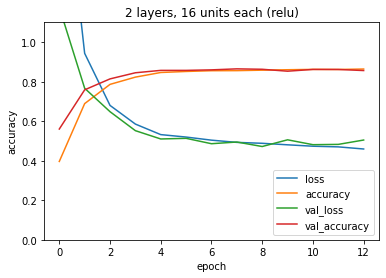

trained in 13 epochs
trained in 55.97 seconds
training accuracy is 0.8635
test accuracy is 0.8648





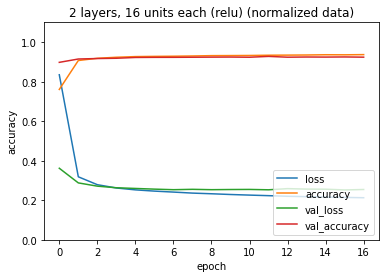

trained in 17 epochs
trained in 75.75 seconds
training accuracy is 0.9360
test accuracy is 0.9278





In [10]:
model_def = {
    "name": "2 layers, 16 units each (relu)",
    "input_layer": tf.keras.layers.Flatten(),
    "hidden_layers": [
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(16, activation=tf.nn.relu)
    ],
    "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    "optimizer": 'adam',
    "loss_func": 'sparse_categorical_crossentropy',
    "metrics": ['accuracy'] 
}
# build model twice (normalized, not normalized data)
mod_1 = build_model(model_def)
mod_2 = build_model(model_def)

#train and visualize both models
run_model(mod_1, x_train, y_train, x_test, y_test, 50, 32, model_def['name'])
run_model(mod_2, x_train_norm, y_train, x_test_norm, y_test, 50, 32, model_def['name'] + ' (normalized data)')


### Two layered model with 16 units each, using tanh

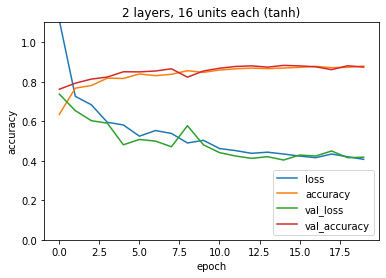

trained in 20 epochs
trained in 100.03 seconds
training accuracy is 0.8768
test accuracy is 0.8824





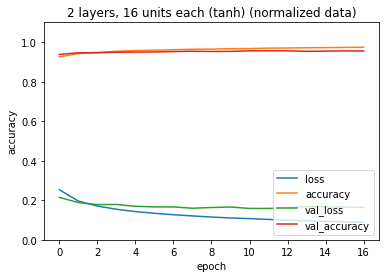

trained in 17 epochs
trained in 91.00 seconds
training accuracy is 0.9730
test accuracy is 0.9563





In [11]:
model_def = {
    "name": "2 layers, 16 units each (tanh)",
    "input_layer": tf.keras.layers.Flatten(),
    "hidden_layers": [
        tf.keras.layers.Dense(16, activation=tf.nn.tanh),
        tf.keras.layers.Dense(16, activation=tf.nn.tanh)
    ],
    "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    "optimizer": 'adam',
    "loss_func": 'sparse_categorical_crossentropy',
    "metrics": ['accuracy'] 
}

# build model twice (normalized, not normalized data)
mod_1 = build_model(model_def)
mod_2 = build_model(model_def)

#train and visualize both models
run_model(mod_1, x_train, y_train, x_test, y_test, 50, 32, model_def['name'])
run_model(mod_2, x_train_norm, y_train, x_test_norm, y_test, 50, 32, model_def['name'] + ' (normalized data)')

### Three layered model with 16 units each, using relu

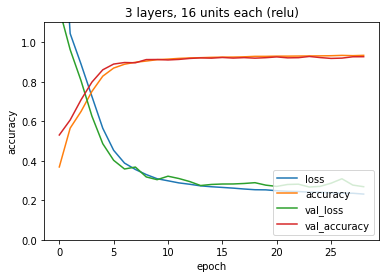

trained in 29 epochs
trained in 161.64 seconds
training accuracy is 0.9368
test accuracy is 0.9275





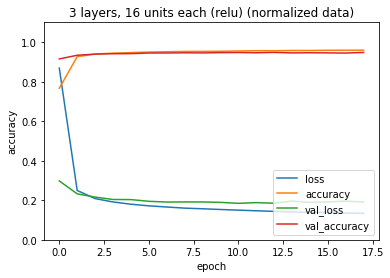

trained in 18 epochs
trained in 111.11 seconds
training accuracy is 0.9608
test accuracy is 0.9480





In [12]:
model_def = {
    "name": "3 layers, 16 units each (relu)",
    "input_layer": tf.keras.layers.Flatten(),
    "hidden_layers": [
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(16, activation=tf.nn.relu)
    ],
    "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    "optimizer": 'adam',
    "loss_func": 'sparse_categorical_crossentropy',
    "metrics": ['accuracy'] 
}

# build model twice (normalized, not normalized data)
mod_1 = build_model(model_def)
mod_2 = build_model(model_def)

#train and visualize both models
run_model(mod_1, x_train, y_train, x_test, y_test, 50, 32, model_def['name'])
run_model(mod_2, x_train_norm, y_train, x_test_norm, y_test, 50, 32, model_def['name'] + ' (normalized data)')

### Three layered model with 16 units each, using tanh

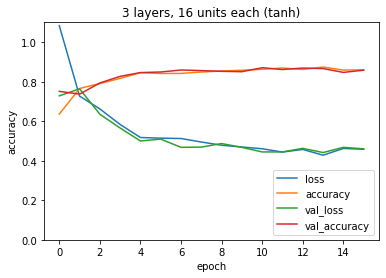

trained in 16 epochs
trained in 98.97 seconds
training accuracy is 0.8709
test accuracy is 0.8705





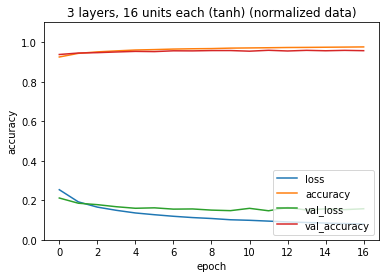

trained in 17 epochs
trained in 104.91 seconds
training accuracy is 0.9769
test accuracy is 0.9587





In [13]:
model_def = {
    "name": "3 layers, 16 units each (tanh)",
    "input_layer": tf.keras.layers.Flatten(),
    "hidden_layers": [
        tf.keras.layers.Dense(16, activation=tf.nn.tanh),
        tf.keras.layers.Dense(16, activation=tf.nn.tanh),
        tf.keras.layers.Dense(16, activation=tf.nn.tanh)
    ],
    "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    "optimizer": 'adam',
    "loss_func": 'sparse_categorical_crossentropy',
    "metrics": ['accuracy'] 
}

# build model twice (normalized, not normalized data)
mod_1 = build_model(model_def)
mod_2 = build_model(model_def)

#train and visualize both models
run_model(mod_1, x_train, y_train, x_test, y_test, 50, 32, model_def['name'])
run_model(mod_2, x_train_norm, y_train, x_test_norm, y_test, 50, 32, model_def['name'] + ' (normalized data)')

### Two layered model with 16 units each, using relu, tanh, sigmoid

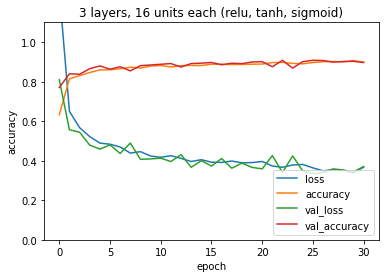

trained in 31 epochs
trained in 155.62 seconds
training accuracy is 0.9061
test accuracy is 0.9081





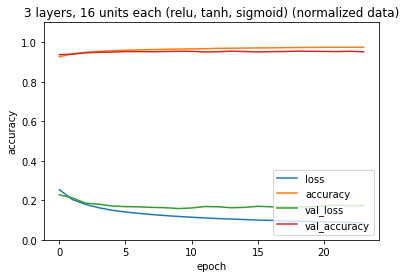

trained in 24 epochs
trained in 142.73 seconds
training accuracy is 0.9761
test accuracy is 0.9543





In [14]:
model_def = {
    "name": "3 layers, 16 units each (relu, tanh, sigmoid)",
    "input_layer": tf.keras.layers.Flatten(),
    "hidden_layers": [
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(16, activation=tf.nn.tanh),
        tf.keras.layers.Dense(16, activation=tf.nn.sigmoid)
    ],
    "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    "optimizer": 'adam',
    "loss_func": 'sparse_categorical_crossentropy',
    "metrics": ['accuracy'] 
}

# build model twice (normalized, not normalized data)
mod_1 = build_model(model_def)
mod_2 = build_model(model_def)

#train and visualize both models
run_model(mod_1, x_train, y_train, x_test, y_test, 50, 32, model_def['name'])
run_model(mod_2, x_train_norm, y_train, x_test_norm, y_test, 50, 32, model_def['name'] + ' (normalized data)')

### One layered model with 64 units, using relu

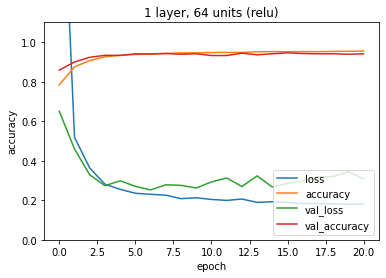

trained in 21 epochs
trained in 148.23 seconds
training accuracy is 0.9563
test accuracy is 0.9457





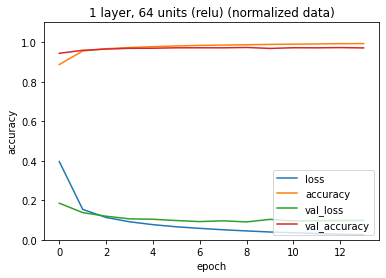

trained in 14 epochs
trained in 110.08 seconds
training accuracy is 0.9898
test accuracy is 0.9730





In [15]:
model_def =  {
    "name": "1 layer, 64 units (relu)",
    "input_layer": tf.keras.layers.Flatten(),
    "hidden_layers": [
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
    ],
    "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    "optimizer": 'adam',
    "loss_func": 'sparse_categorical_crossentropy',
    "metrics": ['accuracy'] 
}

# build model twice (normalized, not normalized data)
mod_1 = build_model(model_def)
mod_2 = build_model(model_def)

#train and visualize both models
run_model(mod_1, x_train, y_train, x_test, y_test, 50, 32, model_def['name'])
run_model(mod_2, x_train_norm, y_train, x_test_norm, y_test, 50, 32, model_def['name'] + ' (normalized data)')

### Three layered model with 32, 24, 16 units, using relu

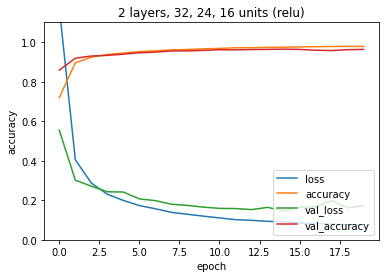

trained in 20 epochs
trained in 164.11 seconds
training accuracy is 0.9800
test accuracy is 0.9645





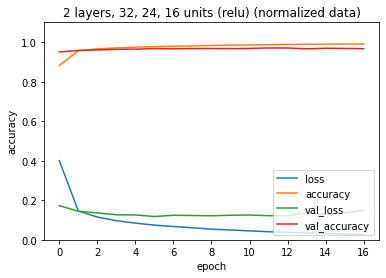

trained in 17 epochs
trained in 95.95 seconds
training accuracy is 0.9905
test accuracy is 0.9705





In [16]:
model_def = {
    "name": "2 layers, 32, 24, 16 units (relu)",
    "input_layer": tf.keras.layers.Flatten(),
    "hidden_layers": [
        tf.keras.layers.Dense(32, activation=tf.nn.relu),
        tf.keras.layers.Dense(24, activation=tf.nn.relu),
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
    ],
    "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    "optimizer": 'adam',
    "loss_func": 'sparse_categorical_crossentropy',
    "metrics": ['accuracy'] 
}

# build model twice (normalized, not normalized data)
mod_1 = build_model(model_def)
mod_2 = build_model(model_def)

#train and visualize both models
run_model(mod_1, x_train, y_train, x_test, y_test, 50, 32, model_def['name'])
run_model(mod_2, x_train_norm, y_train, x_test_norm, y_test, 50, 32, model_def['name'] + ' (normalized data)')